# Riiid Project: Minimally Viable Product (MVP)

## About the Project

- Build a better and more equitable answer correction prediction model for education in a post-COVID-19 world.

## Goals

- Create algorithms for "Knowledge Tracing," the modeling of student knowledge over time. 
- Accurately predict how students will perform on future interactions. 

# Imports

In [1]:
# General Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Train Validate Test
from sklearn.model_selection import train_test_split

# Modeling Imports
from sklearn.cluster import KMeans

# Acquire and Prepare Files
import acquire
from prepare import prep_riiid

from sklearn.preprocessing import MinMaxScaler

# Warnings 
import warnings
warnings.filterwarnings("ignore")

# Acquire

In [2]:
df_train = pd.read_csv('train.csv')
df_validate = pd.read_csv('validate.csv')
df_test = pd.read_csv('test.csv')

df_train.shape, df_validate.shape, df_test.shape

((411517, 18), (50842, 18), (52868, 18))

In [3]:
# Train Data
df_train.head(2)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,0,1864702,5720,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5720.0,5720.0,1.0,5.0,115
1,45951,1864702,5204,0,1,1,0,inf,False,NaN,NaN,NaN,NaN,5204.0,5204.0,3.0,5.0,173


In [4]:
# Validate Data
df_validate.head(2)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,15625124241,1864702,3209,0,2152,3,1,34660.0,True,NaN,NaN,NaN,NaN,3209.0,3207.0,3.0,4.0,157 169 162 38
1,15625124241,1864702,3208,0,2152,3,1,34660.0,True,NaN,NaN,NaN,NaN,3208.0,3207.0,3.0,4.0,113 169 162 38


In [5]:
# Test Data
df_test.head(2)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,20170378604,1864702,8811,0,2494,1,1,3000.0,True,NaN,NaN,NaN,NaN,8811.0,8811.0,1.0,5.0,45
1,20170394313,1864702,8643,0,2495,3,1,4000.0,True,NaN,NaN,NaN,NaN,8643.0,8643.0,3.0,5.0,15


# Prepare

### Running Function that does all prep at once

In [7]:
# Produce train/validate/test
# Produce scaled train/validdate/test
train, validate, test, train_s, validate_s, test_s = prep_riiid(df_train, df_validate, df_test)

In [8]:
# Print the shape of the train
print(train.shape)

# Take a peek at the train
train.head()

(403377, 9)


,answered_correctly,prior_question_had_explanation,user_acc_mean,user_lectures_running_total,avg_user_q_time,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy
0,1,0,0.630049,0,11917302.0,0.818182,0.682248,6.526086e+09,21594.667829
1,0,0,0.630049,0,11917302.0,0.550000,0.534988,6.526086e+09,21594.667829
2,1,0,0.630049,0,11917302.0,0.444444,0.445216,6.526086e+09,21594.667829
3,1,0,0.630049,0,11917302.0,0.406250,0.543241,6.526086e+09,21594.667829
4,0,0,0.630049,0,11917302.0,0.687500,0.485282,6.526086e+09,21594.667829


In [9]:
# Print the shape of the train
print(train_s.shape)

# Take a peek at the train
train_s.head()

(403377, 9)


,answered_correctly,prior_question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,1,0,0.630049,0.818182,0.682248,0.120073,0.500746,0.0,0.002404
1,0,0,0.630049,0.550000,0.534988,0.120073,0.500746,0.0,0.002404
2,1,0,0.630049,0.444444,0.445216,0.120073,0.500746,0.0,0.002404
3,1,0,0.630049,0.406250,0.543241,0.120073,0.500746,0.0,0.002404
4,0,0,0.630049,0.687500,0.485282,0.120073,0.500746,0.0,0.002404


In [10]:
# Print the shape of the train
print(validate.shape)

# Take a peek at the train
validate.head()

(51971, 9)


,answered_correctly,prior_question_had_explanation,user_acc_mean,user_lectures_running_total,avg_user_q_time,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy
0,1,1,0.630049,0,11917302.0,0.468750,0.529412,6.526086e+09,21594.667829
1,1,1,0.630049,0,11917302.0,0.290323,0.578947,6.526086e+09,21594.667829
2,0,1,0.630049,0,11917302.0,0.387755,0.588235,6.526086e+09,21594.667829
3,1,1,0.630049,0,11917302.0,0.740741,0.500000,6.526086e+09,21594.667829
4,0,1,0.630049,0,11917302.0,0.428571,0.588235,6.526086e+09,21594.667829


In [11]:
# Print the shape of the train
print(validate_s.shape)

# Take a peek at the train
validate_s.head()

(51971, 9)


,answered_correctly,prior_question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,1,1,0.630049,0.468750,0.529412,0.120073,0.500746,0.0,0.002404
1,1,1,0.630049,0.290323,0.578947,0.120073,0.500746,0.0,0.002404
2,0,1,0.630049,0.387755,0.588235,0.120073,0.500746,0.0,0.002404
3,1,1,0.630049,0.740741,0.500000,0.120073,0.500746,0.0,0.002404
4,0,1,0.630049,0.428571,0.588235,0.120073,0.500746,0.0,0.002404


In [12]:
# Print the shape of the train
print(test.shape)

# Take a peek at the train
test.head()

(51971, 9)


,answered_correctly,prior_question_had_explanation,user_acc_mean,user_lectures_running_total,avg_user_q_time,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy
0,1,1,0.630049,0,11917302.0,0.468750,0.529412,6.526086e+09,21594.667829
1,1,1,0.630049,0,11917302.0,0.290323,0.578947,6.526086e+09,21594.667829
2,0,1,0.630049,0,11917302.0,0.387755,0.588235,6.526086e+09,21594.667829
3,1,1,0.630049,0,11917302.0,0.740741,0.500000,6.526086e+09,21594.667829
4,0,1,0.630049,0,11917302.0,0.428571,0.588235,6.526086e+09,21594.667829


In [13]:
# Print the shape of the train
print(test_s.shape)

# Take a peek at the train
test_s.head()

(51971, 9)


,answered_correctly,prior_question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,1,1,0.630049,0.468750,0.529412,0.120073,0.500746,0.0,0.002404
1,1,1,0.630049,0.290323,0.578947,0.120073,0.500746,0.0,0.002404
2,0,1,0.630049,0.387755,0.588235,0.120073,0.500746,0.0,0.002404
3,1,1,0.630049,0.740741,0.500000,0.120073,0.500746,0.0,0.002404
4,0,1,0.630049,0.428571,0.588235,0.120073,0.500746,0.0,0.002404


# Explore

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403377 entries, 0 to 411516
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   answered_correctly              403377 non-null  int64  
 1   prior_question_had_explanation  403377 non-null  int64  
 2   user_acc_mean                   403377 non-null  float64
 3   user_lectures_running_total     403377 non-null  int64  
 4   avg_user_q_time                 403377 non-null  float64
 5   mean_content_accuracy           403377 non-null  float64
 6   mean_task_accuracy              403377 non-null  float64
 7   mean_timestamp_accuracy         403377 non-null  float64
 8   mean_priortime_accuracy         403377 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 30.8 MB


In [33]:
for col in train:
    if train[col].dtypes == 'int64':
        print(f'{col} has {train[col].nunique()} unique values.')

answered_correctly has 2 unique values.
prior_question_had_explanation has 2 unique values.
user_lectures_running_total has 249 unique values.


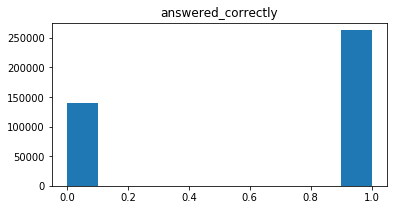

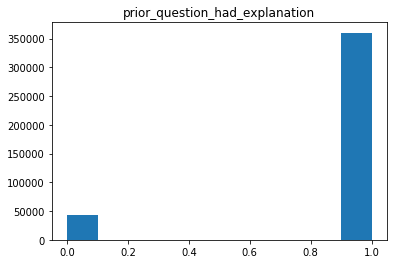

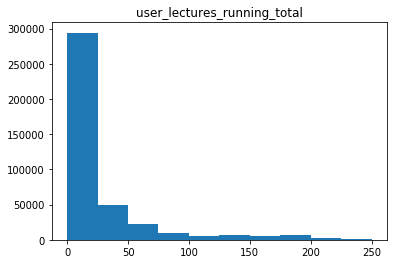

In [31]:
# Plot data to identify outliers and distributions
plt.figure(figsize=(6, 3))
                 
num_cols = train.columns[[train[col].dtype == 'int64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()  

In [34]:
for col in train:
    if train[col].dtypes == 'float64':
        print(f'{col} has {train[col].nunique()} unique values.')

user_acc_mean has 870 unique values.
avg_user_q_time has 1994 unique values.
mean_content_accuracy has 1668 unique values.
mean_task_accuracy has 1165 unique values.
mean_timestamp_accuracy has 2000 unique values.
mean_priortime_accuracy has 1873 unique values.


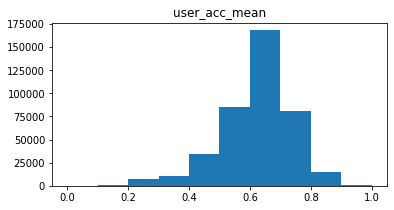

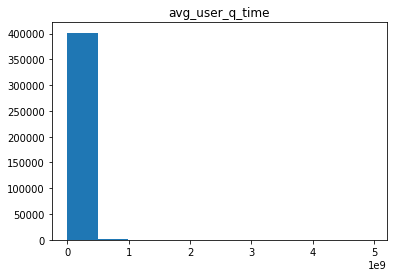

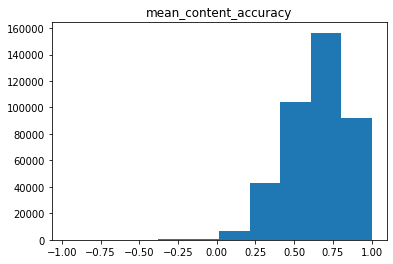

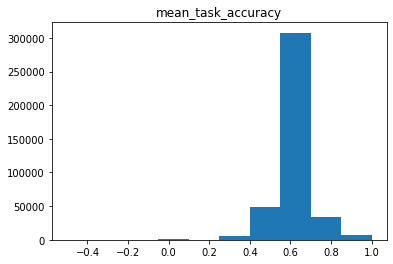

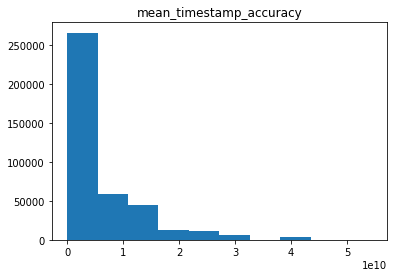

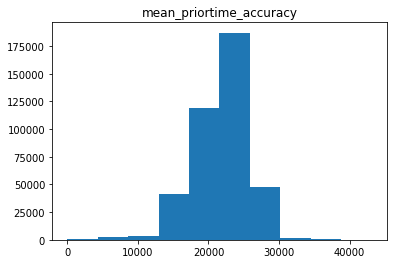

In [29]:
# Plot data to identify outliers and distributions
plt.figure(figsize=(6, 3))
                 
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()  

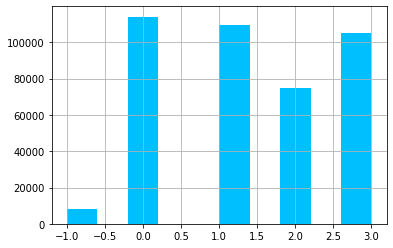

In [36]:
# User answer value count
# Use df_train for this plot
df_train['user_answer'].hist(color='deepskyblue') 
plt.show()

In [40]:
# Used df_train instead of train
df_train.user_answer.value_counts()

 0    114123
 1    109466
 3    105225
 2     74563
-1      8140
Name: user_answer, dtype: int64

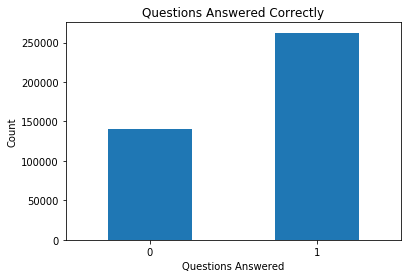

In [38]:
# Answered correctly
# This graph includes lecture counts 
train.answered_correctly.value_counts().sort_index().plot.bar()
answer_correctly = train.answered_correctly.mean()
plt.title("Questions Answered Correctly")
plt.xlabel('Questions Answered')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.show()

NameError: name 'correct' is not defined

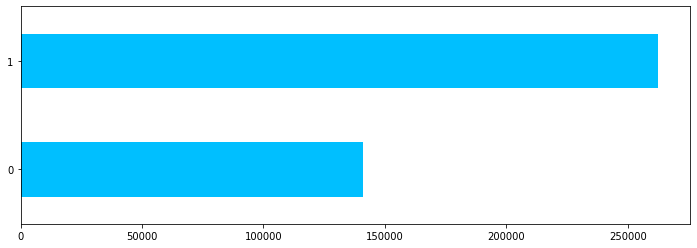

In [44]:
# Answered correctly
# Lectures removed
all_answers = df_train[df_train.answered_correctly != -1].answered_correctly.value_counts(ascending=True)
fig = plt.figure(figsize=(12,4))
all_answers.plot.barh(color="deepskyblue")
for i, v in zip(correct.index, correct.values):
    plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("Questions Answered Correctly")
plt.xticks(rotation=0)
plt.show()

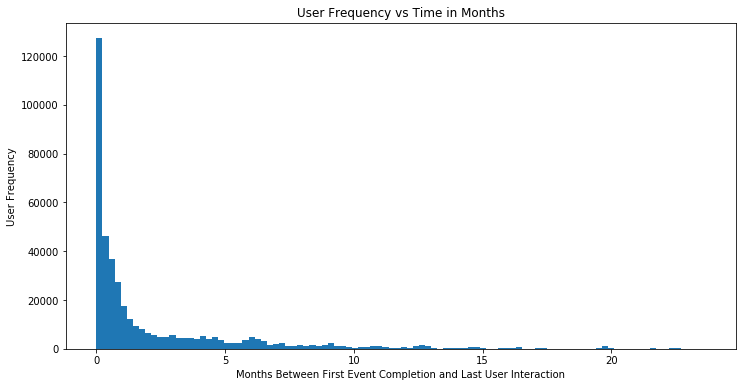

In [47]:
# User_id vs Timestamp
# Had to convert time from in milliseconds to months
ts = df_train['timestamp']/(31536000000/12)
fig = plt.figure(figsize=(12,6))
ts.plot.hist(bins=100)
plt.title("User Frequency vs Time in Months")
plt.xticks(rotation=0)
plt.xlabel("Months Between First Event Completion and Last User Interaction")
plt.ylabel("User Frequency")
plt.show()

In [50]:
user_percent = df_train[df_train.answered_correctly != -1].groupby('user_id')['answered_correctly'].agg(Mean='mean', Answers='count')
print(f'The most number of questions answered by a user is {user_percent.Answers.max()}')

The most number of questions answered by a user is 10878


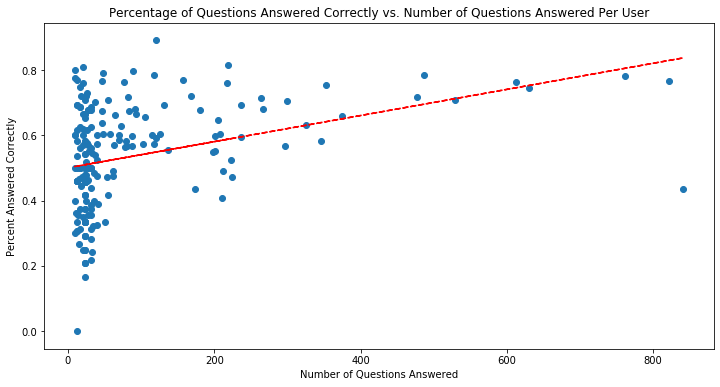

In [51]:
user_percent = user_percent.query('Answers <= 1000').sample(n=200, random_state=1)

fig = plt.figure(figsize=(12,6))
x = user_percent.Answers
y = user_percent.Mean
plt.scatter(x, y, marker='o')
plt.title("Percentage of Questions Answered Correctly vs. Number of Questions Answered Per User")
plt.xlabel("Number of Questions Answered")
plt.ylabel("Percent Answered Correctly")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [52]:
content_percent = df_train[df_train.answered_correctly != -1].groupby('content_id')['answered_correctly'].agg(Mean='mean', Answers='count')
print(f'The highest number of questions asked by content_id is {content_percent.Answers.max()}.')
print(f'Of {len(content_percent)} content_ids, {len(content_percent[content_percent.Answers > 25000])} content_ids had more than 25,000 questions asked.')

The highest number of questions asked by content_id is 1028.
Of 12520 content_ids, 0 content_ids had more than 25,000 questions asked.


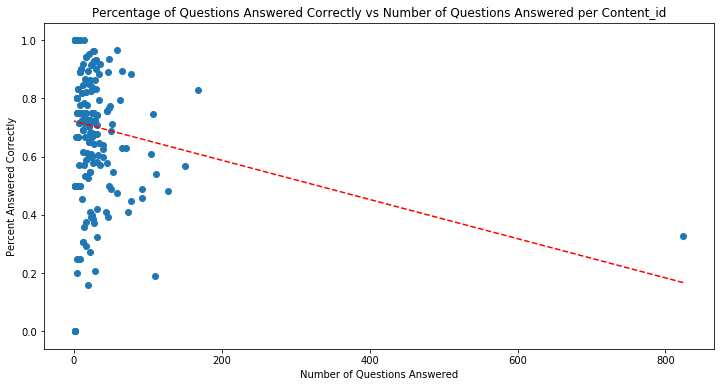

In [53]:
content_percent = content_percent.query('Answers <= 25000').sample(n=200, random_state=1)

fig = plt.figure(figsize=(12,6))
x = content_percent.Answers
y = content_percent.Mean
plt.scatter(x, y, marker='o')
plt.title("Percentage of Questions Answered Correctly vs Number of Questions Answered per Content_id")
plt.xticks(rotation=0)
plt.xlabel("Number of Questions Answered")
plt.ylabel("Percent Answered Correctly")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

prior_question_had_explanation
False     41191
True     360193
Name: (answered_correctly, count), dtype: int64


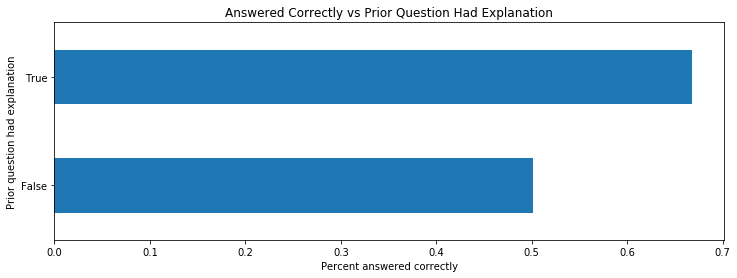

In [54]:
pq = df_train[df_train.answered_correctly != -1].groupby(['prior_question_had_explanation']).agg({'answered_correctly': ['mean', 'count']})
#pq.index = pq.index.astype(str)
print(pq.iloc[:,1])
pq = pq.iloc[:,0]

fig = plt.figure(figsize=(12,4))
pq.plot.barh()
# for i, v in zip(pq.index, pq.values):
#     plt.text(v, i, round(v,2), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("Answered Correctly vs Prior Question Had Explanation")
plt.xlabel("Percent answered correctly")
plt.ylabel("Prior question had explanation")
plt.xticks(rotation=0)
plt.show()

False    1305
True      695
Name: Watches_lecture, dtype: int64


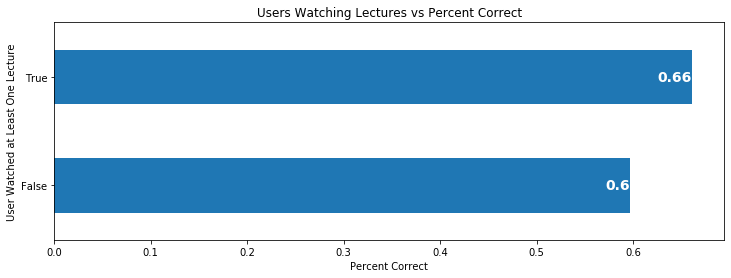

In [55]:
user_lect = df_train.groupby(["user_id", "answered_correctly"]).size().unstack()
user_lect.columns = ['Lecture', 'Wrong', 'Right']
user_lect['Lecture'] = user_lect['Lecture'].fillna(0)
user_lect = user_lect.astype('Int64')
user_lect['Watches_lecture'] = np.where(user_lect.Lecture > 0, True, False)

watches_l = user_lect.groupby("Watches_lecture").agg({'Wrong': ['sum'], 'Right': ['sum']})
print(user_lect.Watches_lecture.value_counts())

watches_l['Percent_correct'] = watches_l.Right/(watches_l.Right + watches_l.Wrong)

watches_l = watches_l.iloc[:,2]

fig = plt.figure(figsize=(12,4))
watches_l.plot.barh()
for i, v in zip(watches_l.index, watches_l.values):
    plt.text(v, i, round(v,2), color='white', fontweight='bold', fontsize=14, ha='right', va='center')

plt.title("Users Watching Lectures vs Percent Correct")
plt.xlabel("Percent Correct")
plt.ylabel("User Watched at Least One Lecture")
plt.xticks(rotation=0)
plt.show()

In [57]:
## Crosstab (Discrete x Discrete)
pd.crosstab(df_train.user_answer, df_train.answered_correctly, margins=True)

answered_correctly,-1,0,1,All
user_answer,,,,
-1,8140,0,0,8140
0,0,39607,74516,114123
1,0,39296,70170,109466
2,0,25069,49494,74563
3,0,36834,68391,105225
All,8140,140806,262571,411517


In [59]:
df_train.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,0,1864702,5720,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5720.0,5720.0,1.0,5.0,115
1,45951,1864702,5204,0,1,1,0,inf,False,NaN,NaN,NaN,NaN,5204.0,5204.0,3.0,5.0,173
2,74342,1864702,4094,0,2,1,1,43000.0,False,NaN,NaN,NaN,NaN,4094.0,4094.0,1.0,5.0,1
3,96778,1864702,9699,0,3,0,1,25000.0,False,NaN,NaN,NaN,NaN,9699.0,9699.0,0.0,5.0,55
4,132969,1864702,5889,0,4,2,0,19000.0,False,NaN,NaN,NaN,NaN,5889.0,5889.0,3.0,5.0,89


In [60]:
# There 3600000 ms in an hour
df_train['ts_in_hours'] = df_train['timestamp']/(3600000)

# There 86400000 ms in an hour
df_train['ts_in_days'] = df_train['timestamp']/(86400000)

df_train 

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags,ts_in_hours,ts_in_days
0,0,1864702,5720,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5720.0,5720.0,1.0,5.0,115,0.000000,0.000000
1,45951,1864702,5204,0,1,1,0,inf,False,NaN,NaN,NaN,NaN,5204.0,5204.0,3.0,5.0,173,0.012764,0.000532
2,74342,1864702,4094,0,2,1,1,43000.0,False,NaN,NaN,NaN,NaN,4094.0,4094.0,1.0,5.0,1,0.020651,0.000860
3,96778,1864702,9699,0,3,0,1,25000.0,False,NaN,NaN,NaN,NaN,9699.0,9699.0,0.0,5.0,55,0.026883,0.001120
4,132969,1864702,5889,0,4,2,0,19000.0,False,NaN,NaN,NaN,NaN,5889.0,5889.0,3.0,5.0,89,0.036936,0.001539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411512,568427,2145492661,172,0,26,1,1,21000.0,False,NaN,NaN,NaN,NaN,172.0,172.0,1.0,1.0,10 164 81,0.157896,0.006579
411513,593283,2145492661,7898,0,27,3,0,18000.0,False,NaN,NaN,NaN,NaN,7898.0,7898.0,2.0,1.0,131 99 29,0.164801,0.006867
411514,614284,2145492661,175,0,28,0,0,22000.0,False,NaN,NaN,NaN,NaN,175.0,175.0,2.0,1.0,9 10 92,0.170634,0.007110
411515,632206,2145492661,100,0,29,2,0,18000.0,False,100.0,70.0,1.0,concept,100.0,100.0,0.0,1.0,131 5 81,0.175613,0.007317


In [61]:
df_train.describe()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,lecture_id,tag,lecture_part,question_id,bundle_id,correct_answer,question_part,ts_in_hours,ts_in_days
count,4.115170e+05,4.115170e+05,411517.000000,411517.000000,411517.000000,411517.000000,411517.000000,401384.0,13501.000000,13501.000000,13501.000000,406579.000000,406579.000000,406579.000000,406579.000000,411517.000000,411517.000000
mean,5.868159e+09,1.083021e+09,5142.540636,0.019780,775.541343,1.375707,0.618276,inf,12270.451300,7.888897,4.194504,4923.058065,4922.630239,1.439415,4.084724,1630.044174,67.918507
std,9.156527e+09,6.700516e+08,3810.084394,0.139245,1240.923367,1.191337,0.524950,NaN,9500.166623,80.663944,1.839912,3204.849006,3204.749562,1.151768,1.671508,2543.479759,105.978323
min,0.000000e+00,1.864702e+06,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.0,89.000000,-128.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.612504e+08,4.844761e+08,2065.000000,0.000000,83.000000,0.000000,0.000000,16000.0,4187.000000,-85.000000,2.000000,2064.000000,2063.000000,0.000000,2.000000,100.347332,4.181139
50%,1.776387e+09,1.059277e+09,4982.000000,0.000000,300.000000,1.000000,1.000000,21000.0,9896.000000,33.000000,5.000000,4851.000000,4851.000000,1.000000,5.000000,493.440732,20.560031
75%,7.594605e+09,1.685634e+09,7216.000000,0.000000,896.000000,3.000000,1.000000,30000.0,19223.000000,71.000000,5.000000,6980.000000,6976.000000,3.000000,5.000000,2109.612507,87.900521
max,6.212613e+10,2.145493e+09,32736.000000,1.000000,9176.000000,3.000000,1.000000,inf,32736.000000,127.000000,7.000000,13522.000000,13522.000000,3.000000,7.000000,17257.259648,719.052485


In [62]:
df_train['quantiles'] = pd.qcut(df_train['ts_in_days'],
                            q=[0,.25,.5,.75,1],
                            labels=False,
                            precision=0)
df_train.quantiles.value_counts()

0    102880
3    102879
2    102879
1    102879
Name: quantiles, dtype: int64

In [63]:
swarm_df = df_train.sample(frac=.001, replace=False, random_state=123)

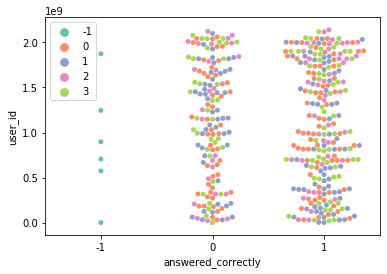

In [64]:
sns.swarmplot(x="answered_correctly", y="user_id", data=swarm_df, hue="user_answer", palette="Set2")
plt.legend()

In [ ]:
# Rates feature importance 
import lightgbm as lgb
model = lgb.df(
                    {'objective': 'binary'}, 
                    lgb_train,
                    valid_sets=[lgb_train, lgb_valid],
                    verbose_eval=100,
                    num_boost_round=10000,
                    early_stopping_rounds=10
                )
print('auc:', roc_auc_score(y_va, model.predict(valid[FEATS])))
_ = lgb.plot_importance(model)

From SelectKBest (need plots)
- 'prior_question_had_explanation'
- 'user_acc_mean'
- 'mean_content_accuracy'
- 'mean_task_accuracy'
- 'mean_priortime_accuracy_scaled'

RFE ranker top 5 
- mean_content_accuracy
- user_acc_mean
- mean_task_accuracy
- avg_user_q_time_scaled
- prior_question_had_explanation

# Feature Engineering

# Modeling

# Conclusions

### Future Investigations

### Resources

- https://www.kaggle.com/c/riiid-test-answer-prediction/overview/description
- https://www.kaggle.com/isaienkov/riiid-answer-correctness-prediction-eda-modeling

### Contact Us

Dani Bojado
- daniella.bojado@gmail.com 

Samuel Davila
- samuelrdavila@gmail.com

Yongliang Shi
- yongliang.michael.shi@gmail.com

Christopher Logan Ortiz
- christopher.logan.ortiz@gmail.com